# Exercice 10: Rasters: affichage, reprojection, rééchantillonnage

O. Kaufmann, 2020, 2023.


In [1]:
# @info: Exécutez-moi pour activer les questions interactives
# -----------------------------------------------------------

from IPython.display import HTML
import codecs

# @hidden
HTML('''
<script>
code_show=true;
function code_toggle() {
 if (code_show){
  $('.cm-comment:contains(@hidden)').closest('div.input').hide();
 } else {
  $('.cm-comment:contains(@hidden)').closest('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<div># @info: Exécutez-moi pour activer les questions interactives </div>
''')

# @info: Exécutez-moi pour cacher le code, puis sauvegardez le notebook


***
## 1. Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling

***
## 2. Lecture d'un raster GeoTIFF

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Le raster LC08_L1TP_198025_20210224_20210304_01_T1.tif contient une image aquise avec le satelllite Landsat 8
</div>

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Chargez le raster
</div>

In [3]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303030223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030302220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e696d6167655f66696c65203d20274c4330385f4c3154505f3139383032355f32303231303232345f32303231303330345f30315f54312f4c4330385f4c3154505f3139383032355f32303231303232345f32303231303330345f30315f54312e746966273c62723e0a737263203d2072696f2e6f70656e28696d6167655f66696c65290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-warning">
<b>Question: </b><br>Affichez une image par composantes : 
        la première en utilisant des teintes rouges, 
        la seconde des teintes vertes 
        et la troisième des teintes bleues.
    
    Comparez les fonctions imshow de matplotlib et show de rasterio.plot.
</div>

avec matplotlib

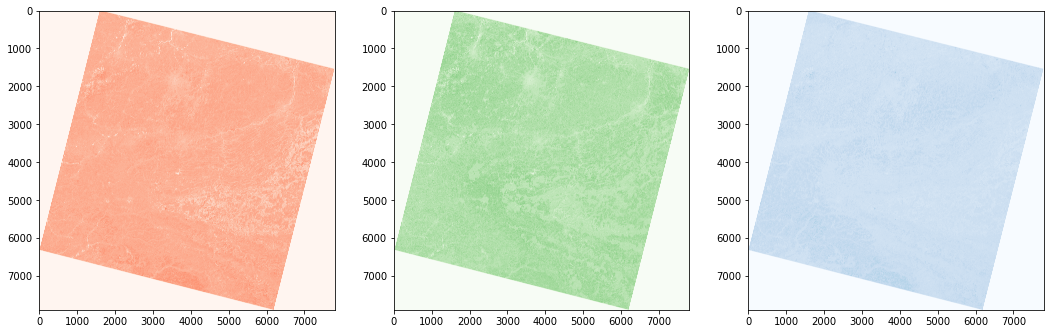

In [ ]:
# Résultat attendu ci-dessous...

avec rasterio

In [5]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303031223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030312220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e6669672c206178203d20706c742e737562706c6f74732866696773697a653d2831382c36292c206e636f6c733d33293c62723e0a666f72206920696e2072616e67652833293a3c62723e0a2020202073686f77287372632e7265616428692b31292c20636d61703d636d6170735b695d2c2061783d61785b695d2c207472616e73666f726d3d7372632e7472616e73666f726d290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-warning">
<b>Question: </b><br>Déterminez le crs du raster
</div>

In [6]:
src.crs

CRS.from_epsg(32631)

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Affichez le raster en utilisant les couleurs formées par les composantes RGB des trois bandes.
</div>

<AxesSubplot:>

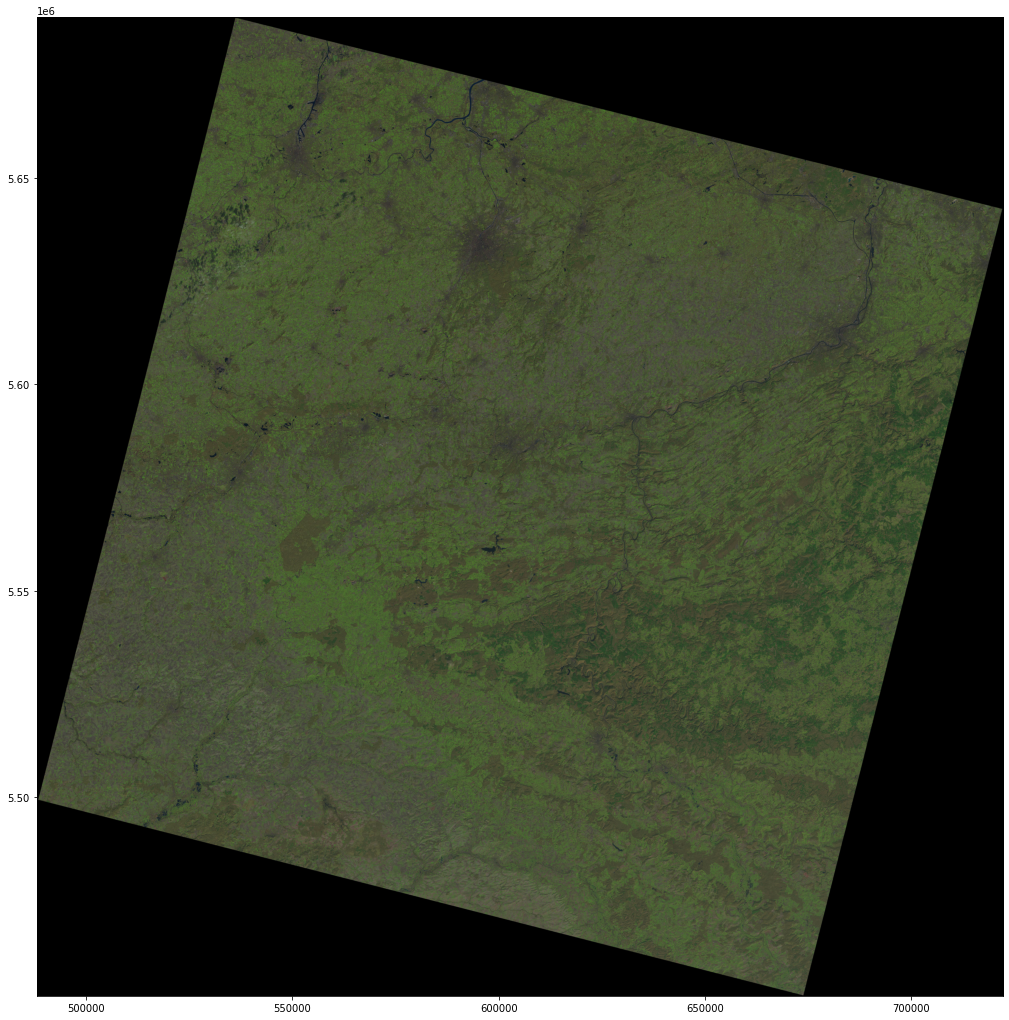

In [ ]:
# Résultat attendu ci-dessous...

***
## 3. Reprojeter l'image et la rééchantillonner

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Déterminez la transformation à appliquer
</div>

In [8]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303032223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030322220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e6473745f637273203d2027455053473a3331333730273c62723e0a7472616e73666f726d2c2077696474682c20686569676874203d2063616c63756c6174655f64656661756c745f7472616e73666f726d287372632e6372732c206473745f6372732c207372632e77696474682c207372632e6865696768742c202a7372632e626f756e6473290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-warning">
<b>Question: </b><br>Reprojetez l'image dans le système Lambert Belge 1972 et rééchantillonnez-là avec la méthode du plus proche voisin. 
    Enregistrez la nouvelle image.  
</div>

In [9]:
# solution @reveal
kwargs = src.meta.copy()
kwargs.update({
    'crs': dst_crs,
    'transform': transform,
    'width': width,
    'height': height
})

with rio.open('./test_reproject_nearest.tif', 'w', **kwargs) as dst:
    for i in range(1, src.count + 1):
        reproject(
            source=rio.band(src, i),
            destination=rio.band(dst, i),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs=dst_crs,
            resampling=Resampling.nearest)

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Rechargez l'image enregistrée
</div>

In [10]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303033223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030332220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e737263203d2072696f2e6f70656e28272e2f746573745f726570726f6a6563745f6e6561726573742e74696627293c62723e0a6669672c206178203d20706c742e737562706c6f74732866696773697a653d2831382c3138292c206e636f6c733d31293c62723e0a73686f77287372632e7265616428292c2061783d61782c207472616e73666f726d3d7372632e7472616e73666f726d293c62723e0a61782e7365745f786c696d283130303030302c20313035303030293c62723e0a61782e7365745f796c696d2839303030302c203935303030290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-warning">
<b>Question: </b><br>Comparez le rééchantillonnage par la méthode des plus proches voisins avec le spline cubique.<br> Affichez cote à cote un zoom de chaque image dans l'étendue suivante:<br>
        X:[103000, 105000] Y:[93000, 95000]
</div>

(93000.0, 95000.0)

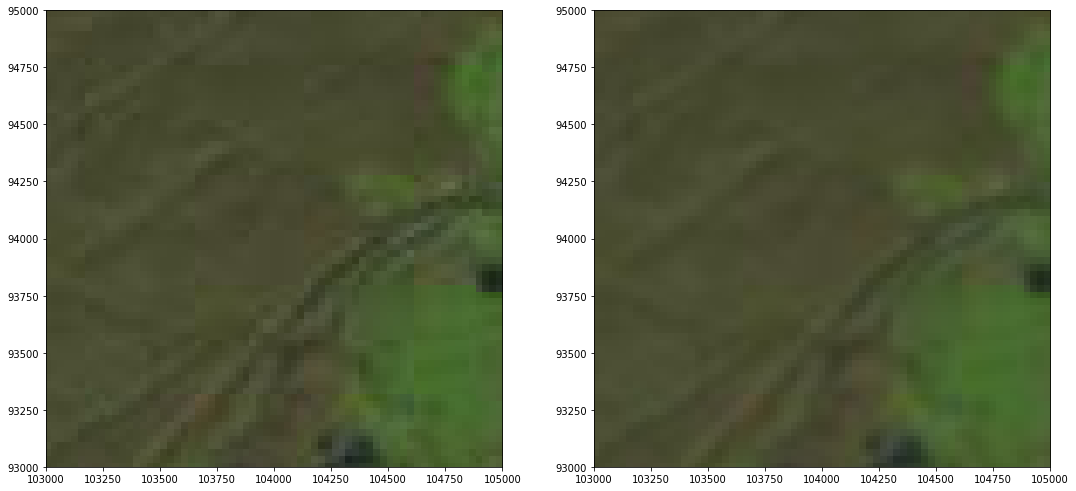

In [ ]:
# Résultat attendu ci-dessous...

***
## 4. Extraire une partie de l'image et l'enregistrer

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Créez un rectangle correspondant à l'étendue à l'aide de shapely<br>
        X:[103000, 105000] Y:[93000, 95000]
</div>

In [13]:
from rasterio.mask import mask
from shapely.geometry import Polygon

In [15]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303034223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030342220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e6f75745f696d6167652c206f75745f7472616e73666f726d203d206d61736b287372632c205b726563745d2c2063726f703d54727565293c62723e0a6f75745f6d657461203d207372632e6d6574613c62723e0a73686f77286f75745f696d616765290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


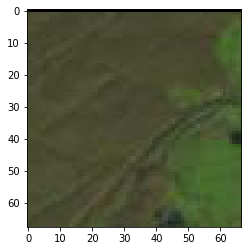

<AxesSubplot:>

In [ ]:
# Résultat attendu ci-dessous...

In [16]:
src.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 7946,
 'height': 8042,
 'count': 3,
 'crs': CRS.from_epsg(31370),
 'transform': Affine(30.006487656723937, 0.0, 38355.8869388211,
        0.0, -30.006487656723937, 227956.8197623482)}

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Mettez à jour les métadonnées et sauvegardez l'image découpée au format GTiff sous le nom masked.tif
</div>

In [17]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303035223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030352220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e6f75745f6d6574612e757064617465287b22647269766572223a20224754696666222c3c62723e0a202020202020202020202020202020202022686569676874223a206f75745f696d6167652e73686170655b315d2c3c62723e0a2020202020202020202020202020202020227769647468223a206f75745f696d6167652e73686170655b325d2c3c62723e0a2020202020202020202020202020202020227472616e73666f726d223a206f75745f7472616e73666f726d7d293c62723e0a3c62723e0a776974682072696f2e6f70656e28226d61736b65642e746966222c202277222c202a2a6f75745f6d6574612920617320646573743a3c62723e0a20202020646573742e7772697465286f75745f696d616765290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-warning">
<b>Question: </b><br>Rechargez l'image
</div>

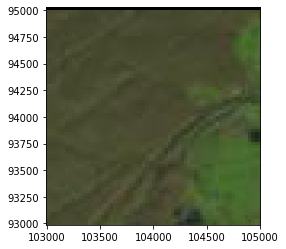

<AxesSubplot:>

In [18]:
src_2 = rio.open('./masked.tif')
show(src_2)

***
## 5. Découper une image raster par un polygone

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Importer le shapefile des anciennes communes. Servez-vous en pour découper l'image du point 1 en la limitant à la nouvelle commune de Mons. Enregistrez l'image découpée et rechargez-la.  
</div>

In [19]:
import geopandas as gpd

In [20]:
gdf = gpd.read_file('./anc_communes.shp')

In [21]:
gdf.set_crs('EPSG:31370', inplace=True)

,AREA,PERIMETER,ANC_COMMUN,INS,CARA,ANCOM,NEWCOM,ARROND,PROVINCE,EPU,geometry
0,4.636606e+06,12495.670,366,62108.0,TOT,LANAYE,VISE,LIEGE,LIEGE,A.I.D.E.,"POLYGON ((241977.297 163806.203, 241980.594 16..."
1,1.189568e+07,17378.920,38,54002.0,TOT,COMINES,COMINES-WARNETON,MOUSCRON,HAINAUT,IPALLE,"POLYGON ((51153.160 163246.000, 51157.578 1632..."
2,8.885221e+06,14219.230,367,62011.0,TOT,EBEN-EMAEL,BASSENGE,LIEGE,LIEGE,A.I.D.E.,"POLYGON ((242876.500 166803.297, 242886.297 16..."
3,6.043729e+06,12224.930,39,54002.0,TOT,HOUTHEM,COMINES-WARNETON,MOUSCRON,HAINAUT,IPALLE,"POLYGON ((52351.441 166997.297, 52344.449 1669..."
4,8.928600e+06,20326.180,1,25005.0,TOT,TOURINNES-LA-GROSSE,BEAUVECHAIN,NIVELLES,BRABANT,I.B.W.,"POLYGON ((175573.297 163242.406, 175582.406 16..."
...,...,...,...,...,...,...,...,...,...,...,...
1601,5.776573e+06,13521.550,739,85047.0,TOT,LAMORTEAU,ROUVROY,VIRTON,LUXEMBOURG,A.I.V.E.,"POLYGON ((229409.000 25423.500, 229439.000 254..."
1602,5.853303e+06,16469.830,740,85047.0,TOT,TORGNY,ROUVROY,VIRTON,LUXEMBOURG,A.I.V.E.,"POLYGON ((233266.703 23374.900, 233354.000 233..."
1603,1.600034e+07,19725.301,1083,61028.0,GP,COUTHUIN,HERON,HUY,LIEGE,A.I.D.E.,"POLYGON ((202802.094 137131.703, 202909.594 13..."
1604,1.229017e+07,16761.170,1103,92003.0,GP,LANDENNE,ANDENNE,NAMUR,NAMUR,I.N.A.S.E.P.,"POLYGON ((197215.906 135883.797, 197268.406 13..."


In [22]:
mons = gdf.query('NEWCOM=="MONS"').dissolve(by='NEWCOM')

In [23]:
mons

,geometry,AREA,PERIMETER,ANC_COMMUN,INS,CARA,ANCOM,ARROND,PROVINCE,EPU
NEWCOM,,,,,,,,,,
MONS,"POLYGON ((124059.898 120195.102, 124049.898 12...",656793.125,4427.599,234,53053.0,PP,CASTEAU,MONS,HAINAUT,I.D.E.A.


In [24]:
mons_geom = mons.geometry

In [25]:
mons_geom

NEWCOM
MONS    POLYGON ((124059.898 120195.102, 124049.898 12...
Name: geometry, dtype: geometry

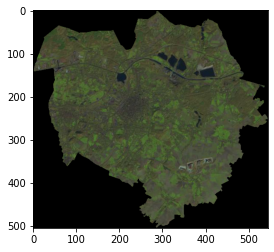

<AxesSubplot:>

In [26]:
out_image, out_transform = mask(src, mons_geom, crop=True)
out_meta = src.meta
show(out_image)

In [27]:
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rio.open("mons.tif", "w", **out_meta) as dest:
    dest.write(out_image)

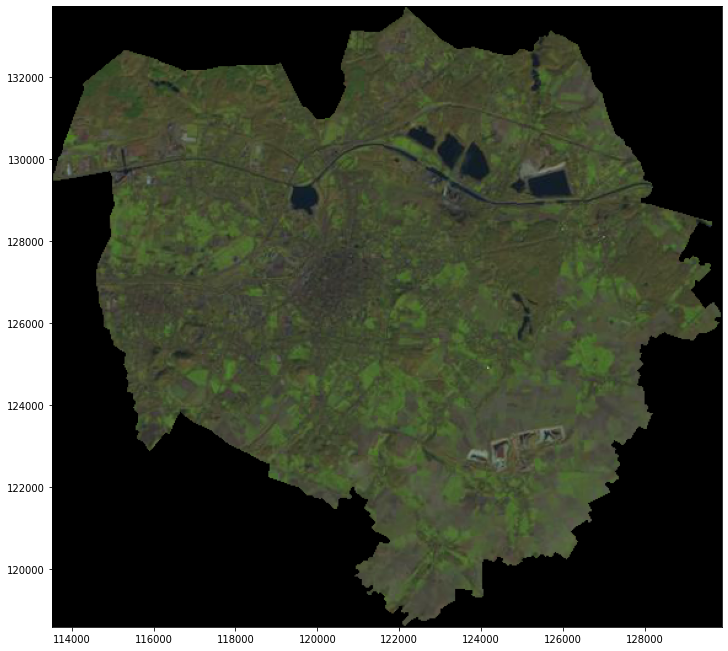

<AxesSubplot:>

In [28]:
fig, ax = plt.subplots(figsize=(12,12))
src_3 = rio.open('./mons.tif', ax=ax)
show(src_3)